# Image_Classifier

## Data Sets and Images are taken from the Kaggle

The Images are converted to the grey scale, also we have the test and train data sets available. Hence no convertion of images is needed.

But, let us see how to convert a image in one of the following cells

In [1]:
#Importing some libraries
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import csv
%matplotlib inline

In [2]:
#Compressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Libraries for encoding and spliting the traning data.
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

## Parsing the images into CSV

Converting the images

In [4]:
import matplotlib.image as mpimg     #Reading images to numpy arrays
from skimage import measure          # Finding the shape contour

import matplotlib.patches as mpatches # To draw a circle at the mean contour
import scipy.ndimage as ndi           # To find the centrality of the image
from pylab import rcParams            # For limiting the image size

In [23]:
#Limiting the image size
rcParams['figure.figsize'] = (6,6)
# Converting the image into numpy array
img = mpimg.imread('headshot.jpg')
img1 = mpimg.imread('headshot.jpg')

In [24]:
img.shape

(7360, 4912, 3)

In [25]:
img

array([[[130, 129, 134],
        [130, 129, 134],
        [130, 129, 134],
        ...,
        [178, 177, 182],
        [178, 177, 182],
        [178, 177, 182]],

       [[130, 129, 134],
        [130, 129, 134],
        [130, 129, 134],
        ...,
        [178, 177, 182],
        [178, 177, 182],
        [178, 177, 182]],

       [[130, 129, 134],
        [130, 129, 134],
        [130, 129, 134],
        ...,
        [178, 177, 182],
        [178, 177, 182],
        [178, 177, 182]],

       ...,

       [[ 21,  21,  21],
        [ 20,  20,  20],
        [ 18,  18,  18],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[ 16,  16,  16],
        [ 17,  17,  17],
        [ 19,  19,  19],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]],

       [[ 12,  12,  12],
        [ 16,  16,  16],
        [ 20,  20,  20],
        ...,
        [ 12,  12,  12],
        [ 12,  12,  12],
        [ 12,  12,  12]]

In [26]:
# Using the image processing library of the scipy finding the center of the image
cx, cy,cz = ndi.center_of_mass(img)
img.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

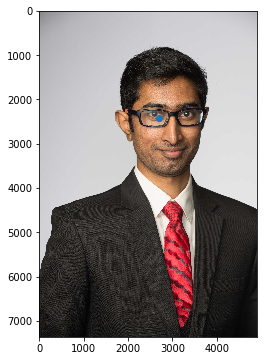

In [29]:
plt.imshow(img,cmap='binary')
#Printing the center of the image
plt.scatter(cx,cy)
plt.show()

Converting this into Black and white image

In [30]:
def threshold(imageArray):
    #Findingout the average colors of array
    balanceArr = []
    newArr = imageArray
    
    balance = np.mean(imageArray.ravel())
    
        
    for eachrow in newArr:
        for eachPix in eachrow:
            if np.mean(eachPix) > balance:
                eachPix[:] = 255
                    
            else:
                eachPix[:] = 0
                    
    return newArr

In [31]:
# img1.setflags(write=1)
# threshold(img1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

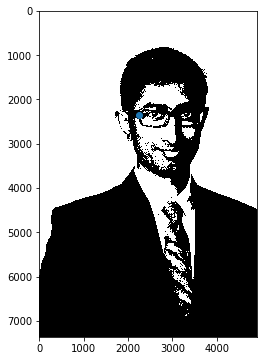

In [32]:
#Printing to the black and white
plt.imshow(img1,cmap='Set3')
#Placing the center of the image
cx1,cy1,cz1 = ndi.center_of_mass(img1)
plt.scatter(cx1,cy1)
plt.show()

In [33]:
# #Useful function
# def createFileList(myDir, format='.jpg'):
#     fileList = []
#     print(myDir)
#     for root, dirs, files in os.walk(myDir, topdown=False):
#         for name in files:
#             if name.endswith(format):
#                 fullName = os.path.join(root, name)
#                 fileList.append(fullName)
#     return fileList

# # load the original image
# myFileList = createFileList('/home/sambasivarao/Pictures/headshot')

# for file in myFileList:
#     print(file)
#     img_file = Image.open(file)
#     # img_file.show()

#     # get original image parameters...
#     width, height = img_file.size
#     format = img_file.format
#     mode = img_file.mode

#     # Make image Greyscale
#     img_grey = img_file.convert('L')
#     #img_grey.save('result.png')
#     #img_grey.show()

#     # Save Greyscale values
#     value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
#     value = value.flatten()
#     print(value)
#     with open("img_pixels.csv", 'a') as f:
#         writer = csv.writer(f)
#         writer.writerow(value)

## Reading in the training data and test data

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [36]:
train.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [37]:
train.species.value_counts()

Acer_Pictum                    10
Acer_Circinatum                10
Magnolia_Heptapeta             10
Alnus_Rubra                    10
Quercus_Trojana                10
Quercus_x_Hispanica            10
Quercus_Rhysophylla            10
Salix_Fragilis                 10
Quercus_Vulcanica              10
Eucalyptus_Neglecta            10
Quercus_Cerris                 10
Acer_Platanoids                10
Quercus_Pontica                10
Callicarpa_Bodinieri           10
Quercus_Agrifolia              10
Magnolia_Salicifolia           10
Alnus_Cordata                  10
Quercus_Infectoria_sub         10
Quercus_Crassipes              10
Alnus_Sieboldiana              10
Populus_Nigra                  10
Populus_Grandidentata          10
Tilia_Platyphyllos             10
Betula_Austrosinensis          10
Quercus_Imbricaria             10
Betula_Pendula                 10
Acer_Palmatum                  10
Cotinus_Coggygria              10
Castanea_Sativa                10
Lithocarpus_Ed

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.7 KB


In [39]:
test.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


## Encoding all the species

In [40]:
def encode(train,test):
    le = LabelEncoder().fit(train.species)
    labels = le.transform(train.species)
    classes = le.classes_
    test_ids = test.id
    
    train = train.drop(['species','id'],axis=1)
    test = test.drop(['id'],axis=1)
    
    return train, labels, test, test_ids, classes
    

In [41]:
train, labels, test, test_ids, classes = encode(train,test)
train.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Stratified Sampling

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 10, test_size=0.2,random_state = 42)

for train_index,test_index in sss.split(np.zeros(train.shape[0],dtype=int),labels):
    X_train,X_test = train.values[train_index],train.values[test_index]
    y_train,y_test = labels[train_index],labels[test_index]

## Classification

In [43]:
from sklearn.metrics import accuracy_score,log_loss,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [44]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel='rbf' , C = 0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

## Logging of Visual Comparison

In [45]:
log_cols = ['Classifier','Accuracy','Log Loss']
log = pd.DataFrame(columns=log_cols)

In [46]:
for classif in classifiers:
    classif.fit(X_train,y_train)
    name = classif.__class__.__name__
    
    print('='*30)
    print(name)
    
    print('***Results***')
    train_predictions = classif.predict(X_test)
    acc = accuracy_score(y_test,train_predictions)
    print("Accuracy: {:.4f}".format(acc))
    
    train_predictions = classif.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[str(name), float(acc*100), float(ll)]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)
    

KNeighborsClassifier
***Results***
Accuracy: 0.9040
Log Loss: 1.572933285163142
SVC
***Results***
Accuracy: 0.7929
Log Loss: 4.595257780513817
NuSVC
***Results***
Accuracy: 0.8535
Log Loss: 2.4772996535513254
DecisionTreeClassifier
***Results***
Accuracy: 0.6515
Log Loss: 12.03624025883261
RandomForestClassifier
***Results***
Accuracy: 0.8990
Log Loss: 0.9387616776654156
AdaBoostClassifier
***Results***
Accuracy: 0.0303
Log Loss: 4.576658797591637
GradientBoostingClassifier
***Results***
Accuracy: 0.5606
Log Loss: 2.4756294963411745
GaussianNB
***Results***
Accuracy: 0.5758
Log Loss: 14.652824015117687
LinearDiscriminantAnalysis
***Results***
Accuracy: 0.9798
Log Loss: 0.9006433152209649
QuadraticDiscriminantAnalysis
***Results***
Accuracy: 0.0253
Log Loss: 33.66658507180697


## Plotting the accuracy and Logloss

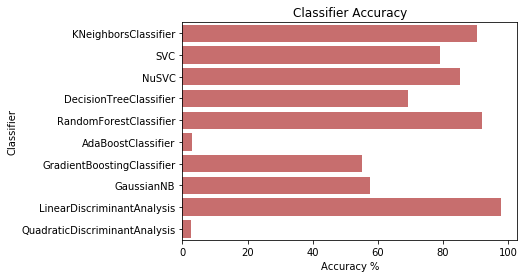

In [31]:
sns.set_color_codes('muted')
x_axis = log['Accuracy']
y_axis = log['Classifier']
sns.barplot(x=x_axis,y=y_axis,color='r')
plt.xlabel('Accuracy %')
plt.title("Classifier Accuracy")
plt.show()

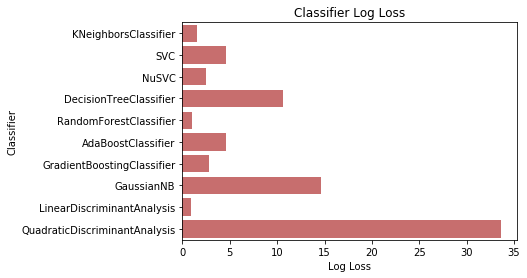

In [32]:
sns.set_color_codes('muted')
x_axis = log['Log Loss']
y_axis = log['Classifier']
sns.barplot(x=x_axis,y=y_axis,color='r')
plt.xlabel('Log Loss')
plt.title("Classifier Log Loss")
plt.show()

## Picking up the favorite Classifier

In [33]:
fav_classifier = LinearDiscriminantAnalysis()
fav_classifier.fit(X_train,y_train)
test_predictions = fav_classifier.predict_proba(X_test)